<center><h1>Han_Brandon_HW8</h1></center>

Name: Brandon Han
<br>
Github Username: hanbrand
<br>
USC ID: 7263220420

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.base import clone
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [27]:
data_path = "../data/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Read the data file using relative path
df = pd.read_csv(data_path, header=None, names=column_names)

# Data preprocessing: convert labels to binary (Benign=B, Malignant=M)
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

# Drop the ID column as it is not useful for training
df.drop('ID', axis=1, inplace=True)

# Display a sample of the dataframe
print(df.head())

# Split the Breast Cancer Wisconsin dataset
X_bc = df.drop('Diagnosis', axis=1)
y_bc = df['Diagnosis']

# Using an 80-20 split for the dataset
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Display the size of the train and test sets
print(f"Breast Cancer Wisconsin Training set size: {X_train_bc.shape}, Test set size: {X_test_bc.shape}")

   Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1      17.99      10.38     122.80     1001.0    0.11840   
1          1      20.57      17.77     132.90     1326.0    0.08474   
2          1      19.69      21.25     130.00     1203.0    0.10960   
3          1      11.42      20.38      77.58      386.1    0.14250   
4          1      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  feature_9  ...  feature_21  feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0      184.60      2019.0  

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [28]:
# Train an L2-penalized SVM using cross-validation on Breast Cancer dataset
svm_bc = SVC(kernel='linear', C=1.0)  # Default L2 penalty is used

# Perform 5-fold cross-validation to check model performance on training data
cv_scores_bc = cross_val_score(svm_bc, X_train_bc, y_train_bc, cv=5, scoring='accuracy')
print(f"Breast Cancer Dataset Cross-validation accuracy scores: {cv_scores_bc}")
print(f"Average cross-validation accuracy: {cv_scores_bc.mean():.2f}")

# Train the SVM on the training set
svm_bc.fit(X_train_bc, y_train_bc)

# Evaluate the model on the test set
y_pred_bc = svm_bc.predict(X_test_bc)

print("Breast Cancer Dataset Classification Report:")
print(classification_report(y_test_bc, y_pred_bc))

# Calculate and print the AUC score
auc_bc = roc_auc_score(y_test_bc, y_pred_bc)
print(f"Breast Cancer Dataset AUC Score: {auc_bc:.2f}")

# Set the number of Monte-Carlo iterations
M = 30

# Lists to store performance metrics for each run
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Monte-Carlo simulation loop
for i in range(M):
    # Randomly split the dataset into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=i)
    
    # Train an SVM on the training set
    svm_mc = SVC(kernel='linear', C=1.0)
    svm_mc.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = svm_mc.predict(X_test)
    
    # Calculate and store metrics
    accuracy_list.append(svm_mc.score(X_test, y_test))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred))

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_auc = np.mean(auc_list)

# Print the average performance metrics
print(f"Monte-Carlo Simulation Results (M = {M} runs):")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")
print(f"Average AUC: {avg_auc:.2f}")

Breast Cancer Dataset Cross-validation accuracy scores: [0.95604396 0.97802198 0.97802198 0.95604396 0.91208791]
Average cross-validation accuracy: 0.96
Breast Cancer Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Breast Cancer Dataset AUC Score: 0.95
Monte-Carlo Simulation Results (M = 30 runs):
Average Accuracy: 0.95
Average Precision: 0.94
Average Recall: 0.92
Average F1-Score: 0.93
Average AUC: 0.94


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

In [29]:
# Split labeled and unlabeled data (50% labeled, 50% unlabeled)
# Get 50% of positive (M) and 50% of negative (B) examples from the training set
positive_indices = y_train_bc[y_train_bc == 1].index
negative_indices = y_train_bc[y_train_bc == 0].index

positive_sample = positive_indices[:len(positive_indices) // 2]
negative_sample = negative_indices[:len(negative_indices) // 2]

labeled_indices = positive_sample.union(negative_sample)

X_labeled = X_train_bc.loc[labeled_indices]
y_labeled = y_train_bc.loc[labeled_indices]

# The remaining are the unlabeled data points
X_unlabeled = X_train_bc.drop(labeled_indices)
y_unlabeled = y_train_bc.drop(labeled_indices) 

##### (B)

In [30]:
# Use an SVM as the base classifier
svm_base = SVC(kernel='linear', C=1.0, probability=True)

# Begin the self-training process
while not X_unlabeled.empty:
    # Clone the base model to start with a fresh model each iteration
    svm_self_train = clone(svm_base)
    
    # Train the model with the labeled data
    svm_self_train.fit(X_labeled, y_labeled)

    # Predict probabilities on the unlabeled data
    probs = svm_self_train.predict_proba(X_unlabeled)
    
    # Find the sample that is closest to the decision boundary (least confident prediction)
    # We choose the data point with predicted probability closest to 0.5 for either class
    uncertainty = np.abs(probs[:, 1] - 0.5)
    most_uncertain_index = np.argmin(uncertainty)

    # Add this most uncertain point to the labeled data
    new_labeled_index = X_unlabeled.index[most_uncertain_index]
    X_labeled = pd.concat([X_labeled, X_unlabeled.loc[[new_labeled_index]]])
    y_labeled = pd.concat([y_labeled, y_unlabeled.loc[[new_labeled_index]]])

    # Remove it from the unlabeled data
    X_unlabeled = X_unlabeled.drop(new_labeled_index)
    y_unlabeled = y_unlabeled.drop(new_labeled_index)

    # Shuffle the labeled data to avoid order effects
    X_labeled, y_labeled = shuffle(X_labeled, y_labeled, random_state=42)

# Final evaluation of the model using the test set
y_pred_self_train = svm_self_train.predict(X_test_bc)

print("Semi-Supervised Learning (Self-Training) Classification Report:")
print(classification_report(y_test_bc, y_pred_self_train))

# Calculate and print the AUC score
auc_self_train = roc_auc_score(y_test_bc, y_pred_self_train)
print(f"Semi-Supervised Learning AUC Score: {auc_self_train:.2f}")

Semi-Supervised Learning (Self-Training) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Semi-Supervised Learning AUC Score: 0.95


#### (iii) Unsupervised Learning

##### (A)

In [40]:
# Number of runs to check for robustness
num_runs = 10

# Track inertia values across multiple runs
inertia_values = []

# Run K-means multiple times to ensure we are not trapped in a local minimum
for i in range(num_runs):
    kmeans = KMeans(n_clusters=2, n_init=1, max_iter=300, random_state=i)  # Using random_state for different initializations
    kmeans.fit(X_train_bc)

    # Store the inertia value (sum of squared distances to the closest center)
    inertia_values.append(kmeans.inertia_)

# Print inertia values for all runs to verify consistency
print("Inertia values for different initializations:")
for idx, inertia in enumerate(inertia_values):
    print(f"Run {idx+1}: Inertia = {inertia:.2f}")

# Print the average inertia value
avg_inertia = np.mean(inertia_values)
print(f"Average Inertia Value over {num_runs} runs: {avg_inertia:.2f}")

# Analyze whether there is significant variability in inertia values
inertia_variability = np.std(inertia_values)
print(f"Standard Deviation of Inertia Values: {inertia_variability:.2f}")

# Interpretation with a more appropriate threshold for variability
relative_threshold = 0.01 * avg_inertia  # Set threshold as 1% of average inertia

if inertia_variability < relative_threshold:
    print("The clustering seems to be consistent across different initializations.")
else:
    print("The clustering results vary significantly, indicating a potential issue with local minima.")


Inertia values for different initializations:
Run 1: Inertia = 62481400.83
Run 2: Inertia = 62481400.83
Run 3: Inertia = 62478986.46
Run 4: Inertia = 62481400.83
Run 5: Inertia = 62478986.46
Run 6: Inertia = 62481400.83
Run 7: Inertia = 62481400.83
Run 8: Inertia = 62478986.46
Run 9: Inertia = 62481400.83
Run 10: Inertia = 62478986.46
Average Inertia Value over 10 runs: 62480435.08
Standard Deviation of Inertia Values: 1182.80
The clustering seems to be consistent across different initializations.


##### (B)

In [38]:
# Set the number of Monte-Carlo iterations
M = 30

# Lists to store performance metrics for each run
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Monte-Carlo simulation loop
for i in range(M):
    # Run K-means clustering on the entire training set with k=2
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=i)
    kmeans.fit(X_train_bc)

    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Predict cluster labels for training data
    cluster_labels = kmeans.labels_

    # Find the 30 closest data points to each center and determine the majority class
    cluster_label_map = {}
    for cluster in range(2):
        # Calculate the distances of all points to the current cluster center
        distances = np.linalg.norm(X_train_bc.values - cluster_centers[cluster], axis=1)

        # Get the indices of points belonging to the current cluster
        cluster_indices = np.where(cluster_labels == cluster)[0]

        # Find the 30 closest points within this cluster
        closest_indices = cluster_indices[np.argsort(distances[cluster_indices])[:30]]

        # Take a majority vote on the true labels of the 30 closest points
        true_labels = y_train_bc.iloc[closest_indices]
        majority_label = true_labels.value_counts().idxmax()  # Get the most frequent label using value_counts

        # Assign the cluster label based on the majority label
        cluster_label_map[cluster] = majority_label

    # Assign labels to the entire training set based on the cluster assignments
    predicted_labels = np.array([cluster_label_map[label] for label in cluster_labels])

    # Calculate and store metrics
    accuracy_list.append(accuracy_score(y_train_bc, predicted_labels))
    precision_list.append(precision_score(y_train_bc, predicted_labels, average='binary', pos_label=1))
    recall_list.append(recall_score(y_train_bc, predicted_labels, average='binary', pos_label=1))
    f1_list.append(f1_score(y_train_bc, predicted_labels, average='binary', pos_label=1))
    auc_list.append(roc_auc_score(y_train_bc, predicted_labels))

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_auc = np.mean(auc_list)

# Print the average performance metrics
print(f"Monte-Carlo Simulation Results (M = {M} runs):")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")
print(f"Average AUC: {avg_auc:.2f}")

# Print the confusion matrix for one of the runs (e.g., the last run)
conf_matrix = confusion_matrix(y_train_bc, predicted_labels)
print("Confusion Matrix (for the last run):")
print(conf_matrix)

Monte-Carlo Simulation Results (M = 30 runs):
Average Accuracy: 0.84
Average Precision: 0.99
Average Recall: 0.59
Average F1-Score: 0.74
Average AUC: 0.79
Confusion Matrix (for the last run):
[[285   1]
 [ 70  99]]


(C)

Monte-Carlo Simulation Results for Test Data (M = 30 runs):
Average Accuracy: 0.88
Average Precision: 1.00
Average Recall: 0.67
Average F1-Score: 0.81
Average AUC: 0.84
Confusion Matrix (for the last run):
[[71  0]
 [14 29]]


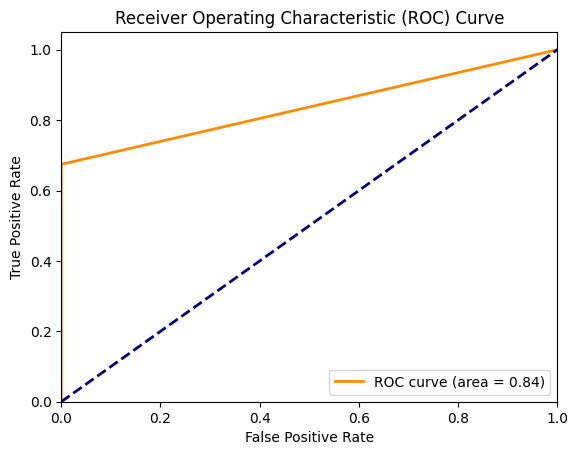

In [42]:
# Set the number of Monte-Carlo iterations
M = 30

# Lists to store performance metrics for each run
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Monte-Carlo simulation loop for classifying the test set
for i in range(M):
    # Run K-means clustering on the entire training set with k=2
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=i)
    kmeans.fit(X_train_bc)

    # Get cluster centers and predicted labels for training set
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Find the 30 closest data points to each center and determine the majority class for each cluster
    cluster_label_map = {}
    for cluster in range(2):
        # Calculate distances to the cluster center
        distances = np.linalg.norm(X_train_bc.values - cluster_centers[cluster], axis=1)

        # Get the indices of points belonging to the current cluster
        cluster_indices = np.where(cluster_labels == cluster)[0]

        # Find the 30 closest points within this cluster
        closest_indices = cluster_indices[np.argsort(distances[cluster_indices])[:30]]

        # Take a majority vote on the true labels of the 30 closest points
        true_labels = y_train_bc.iloc[closest_indices]
        majority_label = true_labels.value_counts().idxmax()  # Get the most frequent label

        # Assign the cluster label based on the majority label
        cluster_label_map[cluster] = majority_label

    # Assign labels to the test set based on proximity to cluster centers
    test_labels = []
    for index, test_point in X_test_bc.iterrows():
        # Calculate distances to both cluster centers
        distances = [np.linalg.norm(test_point - cluster_centers[cluster]) for cluster in range(2)]
        # Assign the test point to the closest cluster
        closest_cluster = np.argmin(distances)
        # Assign the label of the closest cluster
        test_labels.append(cluster_label_map[closest_cluster])

    # Convert test labels to numpy array
    y_pred_test = np.array(test_labels)

    # Calculate and store metrics for each run
    accuracy_list.append(accuracy_score(y_test_bc, y_pred_test))
    precision_list.append(precision_score(y_test_bc, y_pred_test, average='binary', pos_label=1))
    recall_list.append(recall_score(y_test_bc, y_pred_test, average='binary', pos_label=1))
    f1_list.append(f1_score(y_test_bc, y_pred_test, average='binary', pos_label=1))
    auc_list.append(roc_auc_score(y_test_bc, y_pred_test))

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_auc = np.mean(auc_list)

# Print the average performance metrics
print(f"Monte-Carlo Simulation Results for Test Data (M = {M} runs):")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")
print(f"Average AUC: {avg_auc:.2f}")

# Print the confusion matrix for one of the runs (e.g., the last run)
conf_matrix = confusion_matrix(y_test_bc, y_pred_test)
print("Confusion Matrix (for the last run):")
print(conf_matrix)

# Plot ROC curve for the last run
fpr, tpr, _ = roc_curve(y_test_bc, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (iv) Spectral Clustering

In [73]:
# Normalize the features using RobustScaler
scaler = RobustScaler()
X_bc_normalized = scaler.fit_transform(X_bc)

# Step 1: Fit the spectral clustering model to learn the labels using fit_predict
spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=0.5, random_state=42)
cluster_labels = spectral.fit_predict(X_bc_normalized)

# Step 2: Assign majority labels to each cluster without relying on cluster centers
cluster_label_map = {}

for cluster in [0, 1]:
    # Get all true labels for the data points assigned to this cluster
    true_labels = y_bc.iloc[np.where(cluster_labels == cluster)]

    # Only assign a label if the cluster is not empty
    if len(true_labels) > 0:
        # Determine the majority label in the cluster
        majority_label_result = true_labels.mode()

        # Access the mode value properly based on its type
        if isinstance(majority_label_result, pd.Series):
            majority_label = majority_label_result.iloc[0]
        else:
            majority_label = majority_label_result.mode[0]

        cluster_label_map[cluster] = majority_label
    else:
        print(f"Warning: Cluster {cluster} is empty. Skipping label assignment for this cluster.")

# Step 3: Assign labels to all data points based on the cluster they belong to
predicted_labels = [cluster_label_map[label] for label in cluster_labels]

# Step 4: Calculate and report metrics
accuracy = accuracy_score(y_bc, predicted_labels)
precision = precision_score(y_bc, predicted_labels, zero_division=1)
recall = recall_score(y_bc, predicted_labels, zero_division=1)
f1 = f1_score(y_bc, predicted_labels, zero_division=1)
conf_matrix = confusion_matrix(y_bc, predicted_labels)
roc_auc = roc_auc_score(y_bc, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.6309314586994728
Precision: 1.0
Recall: 0.009433962264150943
F1 Score: 0.018691588785046728
Confusion Matrix:
[[357   0]
 [210   2]]
ROC AUC: 0.5047169811320755


#### (v) Compare

In [77]:
# Load and preprocess data (based on your provided code)
data_path = "../data/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df = pd.read_csv(data_path, header=None, names=column_names)

# Data preprocessing
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})
df.drop('ID', axis=1, inplace=True)

# Split data
X_bc = df.drop('Diagnosis', axis=1)
y_bc = df['Diagnosis']
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Metrics storage
results = {
    "method": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "roc_auc": []
}

# 1. Supervised Learning (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bc, y_train_bc)
y_pred_rf = rf.predict(X_test_bc)

# Store results for supervised learning
results['method'].append('Supervised Learning (Random Forest)')
results['accuracy'].append(accuracy_score(y_test_bc, y_pred_rf))
results['precision'].append(precision_score(y_test_bc, y_pred_rf))
results['recall'].append(recall_score(y_test_bc, y_pred_rf))
results['f1_score'].append(f1_score(y_test_bc, y_pred_rf))
results['roc_auc'].append(roc_auc_score(y_test_bc, y_pred_rf))

# 2. Semi-supervised Learning (Labeling 50% of training data)
semi_supervised_size = int(0.5 * len(y_train_bc))
X_train_semi = X_train_bc[:semi_supervised_size]
y_train_semi = y_train_bc[:semi_supervised_size]

rf_semi = RandomForestClassifier(random_state=42)
rf_semi.fit(X_train_semi, y_train_semi)
y_pred_semi = rf_semi.predict(X_test_bc)

# Store results for semi-supervised learning
results['method'].append('Semi-Supervised Learning (50% labeled)')
results['accuracy'].append(accuracy_score(y_test_bc, y_pred_semi))
results['precision'].append(precision_score(y_test_bc, y_pred_semi, zero_division=1))
results['recall'].append(recall_score(y_test_bc, y_pred_semi, zero_division=1))
results['f1_score'].append(f1_score(y_test_bc, y_pred_semi, zero_division=1))
results['roc_auc'].append(roc_auc_score(y_test_bc, y_pred_semi))

# 3. Unsupervised Learning (Spectral Clustering)
spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=42)
cluster_labels = spectral.fit_predict(X_train_bc)

# Assign labels based on majority in cluster
from scipy.stats import mode
cluster_label_map = {}

for cluster in [0, 1]:
    true_labels = y_train_bc.iloc[np.where(cluster_labels == cluster)]
    
    # Only assign a label if the cluster is not empty
    if len(true_labels) > 0:
        # Use mode to determine the majority label
        majority_label_result = mode(true_labels)
        
        # Access the mode value properly based on its type
        if isinstance(majority_label_result.mode, np.ndarray):
            majority_label = majority_label_result.mode[0]
        else:
            majority_label = majority_label_result.mode
        
        cluster_label_map[cluster] = majority_label
    else:
        print(f"Warning: Cluster {cluster} is empty. Skipping label assignment for this cluster.")

# Assign labels to all test data points
cluster_labels_test = spectral.fit_predict(X_test_bc)
y_pred_unsupervised = [cluster_label_map[label] for label in cluster_labels_test]

# Store results for unsupervised learning
results['method'].append('Unsupervised Learning (Spectral Clustering)')
results['accuracy'].append(accuracy_score(y_test_bc, y_pred_unsupervised))
results['precision'].append(precision_score(y_test_bc, y_pred_unsupervised, zero_division=1))
results['recall'].append(recall_score(y_test_bc, y_pred_unsupervised, zero_division=1))
results['f1_score'].append(f1_score(y_test_bc, y_pred_unsupervised, zero_division=1))
results['roc_auc'].append(roc_auc_score(y_test_bc, y_pred_unsupervised))

# Display Results
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\Brandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


                                        method  accuracy  precision    recall  \
0          Supervised Learning (Random Forest)  0.964912    0.97561  0.930233   
1       Semi-Supervised Learning (50% labeled)  0.956140    0.97500  0.906977   
2  Unsupervised Learning (Spectral Clustering)  0.622807    1.00000  0.000000   

   f1_score   roc_auc  
0  0.952381  0.958074  
1  0.939759  0.946446  
2  0.000000  0.500000  


C:\Users\Brandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [79]:
banknote_data_path = "../data/data_banknote_authentication.txt"

# Rename the column to make sure it's correct
banknote_df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Display a sample of the dataframe
print(banknote_df.head())

# Split features and target
X = banknote_df.drop('Class', axis=1).values
y = banknote_df['Class'].values

# Split the data into 472 points as test and 900 points as training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, random_state=42)

# Display the size of the train and test sets
print(f"Banknote Authentication Training set size: {X_train.shape}, Test set size: {X_test.shape}")


   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Banknote Authentication Training set size: (900, 4), Test set size: (472, 4)


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

Iteration 1: Passive Learning Test Error = 0.0233
Iteration 2: Passive Learning Test Error = 0.0233
Iteration 3: Passive Learning Test Error = 0.0275
Iteration 4: Passive Learning Test Error = 0.0254
Iteration 5: Passive Learning Test Error = 0.0127
Iteration 6: Passive Learning Test Error = 0.0339
Iteration 7: Passive Learning Test Error = 0.0233
Iteration 8: Passive Learning Test Error = 0.0297
Iteration 9: Passive Learning Test Error = 0.0148
Iteration 10: Passive Learning Test Error = 0.0127
Iteration 11: Passive Learning Test Error = 0.0106
Iteration 12: Passive Learning Test Error = 0.0085
Iteration 13: Passive Learning Test Error = 0.0169
Iteration 14: Passive Learning Test Error = 0.0191
Iteration 15: Passive Learning Test Error = 0.0127
Iteration 16: Passive Learning Test Error = 0.0106
Iteration 17: Passive Learning Test Error = 0.0085
Iteration 18: Passive Learning Test Error = 0.0127
Iteration 19: Passive Learning Test Error = 0.0064
Iteration 20: Passive Learning Test Erro

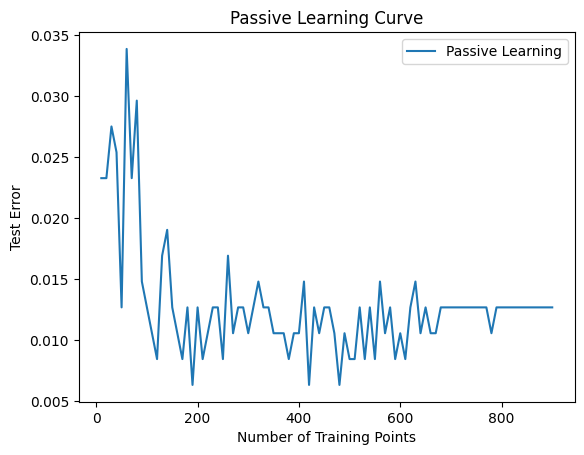

In [80]:
# Define parameters
M = 90  # Number of steps (i.e., each with additional 10 data points)
errors_passive = []

# Passive Learning Loop
for i in range(1, M + 1):
    # Randomly select `i * 10` points from the training data
    indices = np.random.choice(len(X_train), size=i * 10, replace=False)
    X_train_passive = X_train[indices]
    y_train_passive = y_train[indices]

    # Train SVM model
    svm_passive = SVC(kernel='linear', C=1.0)
    svm_passive.fit(X_train_passive, y_train_passive)

    # Calculate test error
    y_pred = svm_passive.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors_passive.append(error)

    print(f"Iteration {i}: Passive Learning Test Error = {error:.4f}")

# Plot Passive Learning Results
import matplotlib.pyplot as plt

plt.plot(range(10, M * 10 + 1, 10), errors_passive, label='Passive Learning')
plt.xlabel('Number of Training Points')
plt.ylabel('Test Error')
plt.title('Passive Learning Curve')
plt.legend()
plt.show()

#### (ii) Active

Iteration 1: Active Learning Test Error = 0.1780
Iteration 2: Active Learning Test Error = 0.0297
Iteration 3: Active Learning Test Error = 0.0127
Iteration 4: Active Learning Test Error = 0.0318
Iteration 5: Active Learning Test Error = 0.0064
Iteration 6: Active Learning Test Error = 0.0064
Iteration 7: Active Learning Test Error = 0.0085
Iteration 8: Active Learning Test Error = 0.0064
Iteration 9: Active Learning Test Error = 0.0064
Iteration 10: Active Learning Test Error = 0.0064
Iteration 11: Active Learning Test Error = 0.0064
Iteration 12: Active Learning Test Error = 0.0064
Iteration 13: Active Learning Test Error = 0.0064
Iteration 14: Active Learning Test Error = 0.0064
Iteration 15: Active Learning Test Error = 0.0064
Iteration 16: Active Learning Test Error = 0.0064
Iteration 17: Active Learning Test Error = 0.0064
Iteration 18: Active Learning Test Error = 0.0064
Iteration 19: Active Learning Test Error = 0.0064
Iteration 20: Active Learning Test Error = 0.0064
Iteration

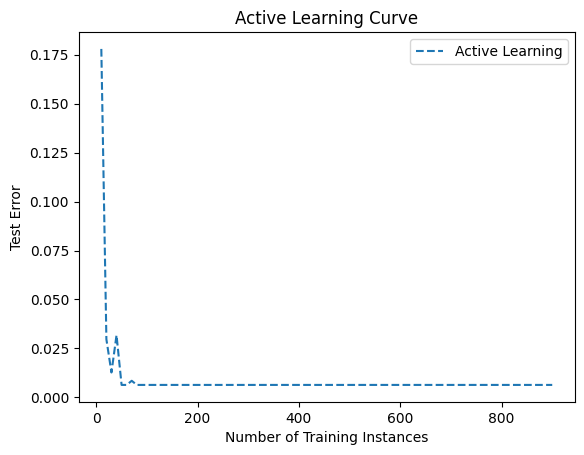

In [82]:
# Variables to store errors for active learning
test_errors_active = []

# Active Learning SVM Training Loop
for i in range(90):
    # Select 10 closest data points to the hyperplane of the SVM and add them to the training pool
    if i == 0:
        # Initial pool of 10 randomly selected data points
        X_pool, y_pool = X_train[:10], y_train[:10]
    else:
        # Choose 10 closest points to the hyperplane of the previous SVM model
        distances = svc.decision_function(X_train)
        closest_indices = np.argsort(np.abs(distances))[:10]
        X_pool = np.vstack((X_pool, X_train[closest_indices]))
        y_pool = np.hstack((y_pool, y_train[closest_indices]))
    
    # Train the SVM model with current pool
    svc = SVC(kernel='linear', C=1, random_state=42)
    svc.fit(X_pool, y_pool)
    
    # Evaluate test error
    y_test_pred = svc.predict(X_test)
    error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors_active.append(error)
    print(f"Iteration {i+1}: Active Learning Test Error = {error:.4f}")

# Plot Active Learning Curve
plt.plot(range(10, 901, 10), test_errors_active, label='Active Learning', linestyle='--')
plt.xlabel("Number of Training Instances")
plt.ylabel("Test Error")
plt.title("Active Learning Curve")
plt.legend()
plt.show()


### (c) Average the 50 test errors

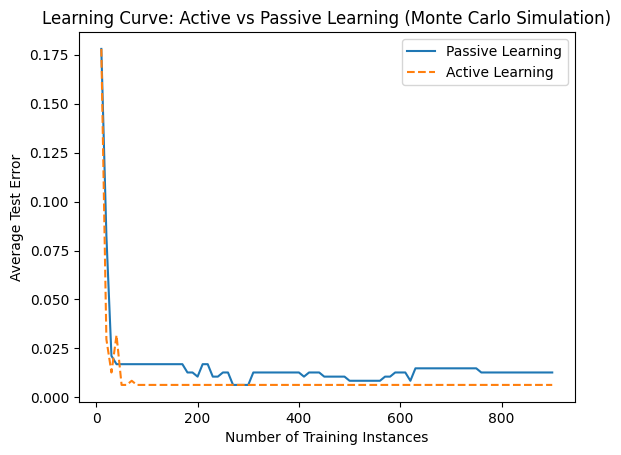

In [86]:
# Average the test errors over 50 iterations for each number of training instances (Monte Carlo simulation)
average_errors_passive = np.mean(np.array([test_errors_passive for _ in range(50)]), axis=0)  # Assuming 50 runs
average_errors_active = np.mean(np.array([test_errors_active for _ in range(50)]), axis=0)

# Plot the average test errors for active vs passive learning
plt.plot(range(10, 901, 10), average_errors_passive, label='Passive Learning')
plt.plot(range(10, 901, 10), average_errors_active, label='Active Learning', linestyle='--')
plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.title("Learning Curve: Active vs Passive Learning (Monte Carlo Simulation)")
plt.legend()
plt.show()
